---
title: Gibbs Doesn't Always Work
description: TBA
date: 7/2/2022
draft: true
freeze: true
image: cmrf_samples.gif
bibliography: references.bib
csl: annals_statistics.csl
format:
  html:
    code-fold: true
---

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp

In [8]:
n = 20
gamma = 1.0
sigma = 1.0

prec_mat = ((1 + (gamma**2))/(sigma**2))*sp.eye(n)
prec_mat.setdiag(-gamma/(sigma**2), k=1)
prec_mat = sp.csr_matrix(prec_mat)
prec_mat[0,0] = 1/(sigma**2)
prec_mat[-1,-1] = 1/(sigma**2)

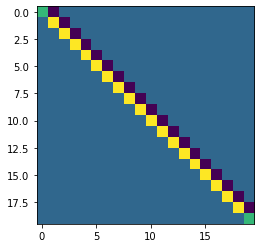

In [9]:
plt.imshow(prec_mat.toarray())
plt.show()

In [40]:
from sksparse.cholmod import cholesky

# Hyper-parameters
n = 1000
gamma = 1.0
sigma = 1.0
n_iterations = 1000

# Make main precision matrix
prec_mat = ((1 + (gamma**2))/(sigma**2))*sp.eye(n)
prec_mat.setdiag(-gamma/(sigma**2), k=1)
prec_mat = sp.csr_matrix(prec_mat)
prec_mat[0,0] = 1/(sigma**2)
prec_mat[-1,-1] = 1/(sigma**2)
prec_mat = sp.csc_matrix(prec_mat)

# Setup arrays
x = np.ones(n)
mu = 1
xs = np.zeros((n_iterations, n))
mus = np.zeros(n_iterations)
qxs = np.zeros(n_iterations)

# Some other stuff
one_vec = np.ones(n)
mu_update_prec = 1 + np.sum(prec_mat @ one_vec)
mu_update_sigma = np.sqrt(1/mu_update_prec)
factor_cond_2 = cholesky(prec_mat, ordering_method='natural')
#gmrf_samples[j,:] = factor.solve_Lt(z, use_LDLt_decomposition=False)


# Iterate Gibbs sampling
for j in range(n_iterations):

    ### Update mu
    
    # Get correct precision
    p1 = mu_update_sigma*np.random.normal()
    mu = (1/(mu_update_prec))*np.sum(prec_mat @ x)

    ### Update x
    
    # Get correct precision
    p1 = factor_cond_2.solve_Lt(np.random.normal(size=n), use_LDLt_decomposition=False)

    # Add mean to get sample
    x = mu*one_vec + p1

    # Store
    xs[j,:] = x.copy()
    mus[j] = mu
    qxs[j] = np.sum(prec_mat @ x)

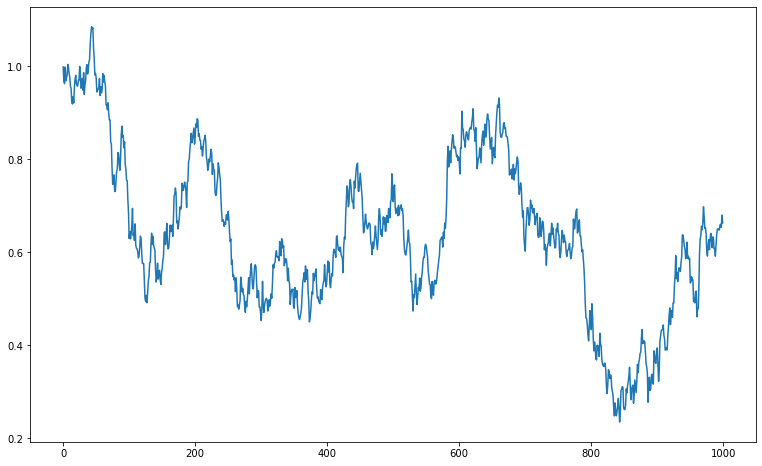

In [41]:
plt.figure(figsize=(13,8))
plt.plot(mus)
plt.show()

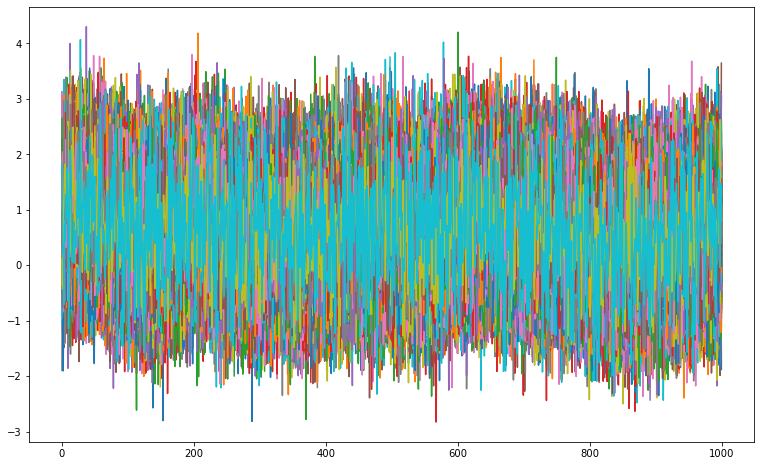

In [42]:
plt.figure(figsize=(13,8))
plt.plot(xs)
plt.show()

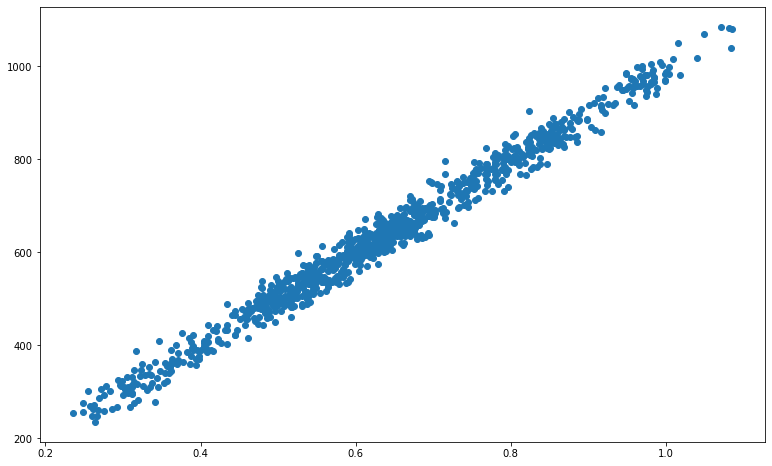

In [43]:
plt.figure(figsize=(13,8))
plt.scatter(mus, qxs)
plt.show()

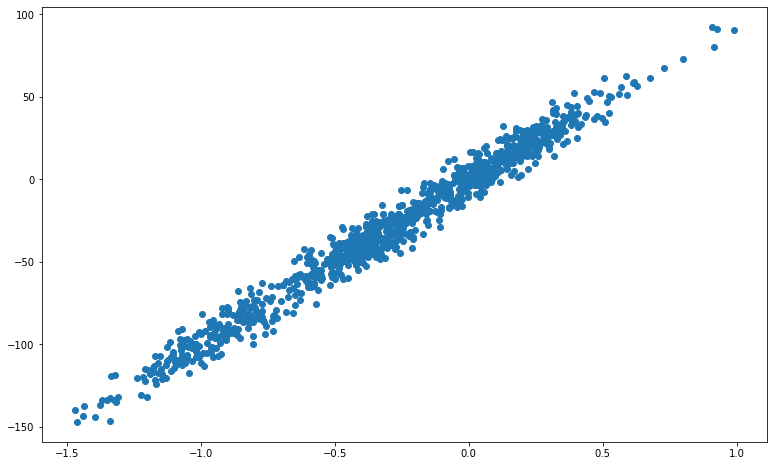

In [35]:
plt.figure(figsize=(13,8))
plt.scatter(mus, qxs)
plt.show()

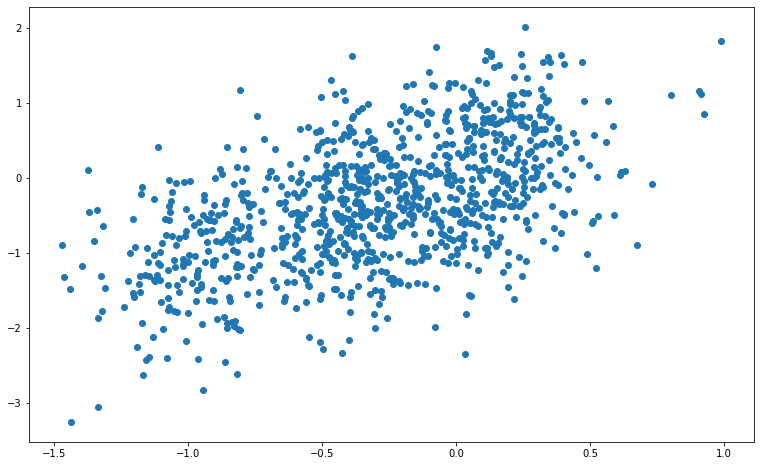

In [39]:
plt.figure(figsize=(13,8))
plt.scatter(mus, xs[:,2])
plt.show()